In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [3]:
df.shape

(397, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [5]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [6]:
df.isna().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [7]:
df.max()

rank               Prof
discipline            B
yrs.since.phd        56
yrs.service          60
sex                Male
salary           231545
dtype: object

In [8]:
df.min()

rank             AssocProf
discipline               A
yrs.since.phd            1
yrs.service              0
sex                 Female
salary               57800
dtype: object

In [9]:
df[['yrs.service','yrs.since.phd']][df['yrs.service']==0]

,yrs.service,yrs.since.phd
13,0,2
28,0,11
35,0,5
95,0,4
114,0,12
127,0,2
154,0,4
157,0,1
164,0,1
287,0,2


In [10]:
cont_df = df.select_dtypes(include=[np.number])
cat_df = df.select_dtypes(include=[np.object])
print(cont_df.shape)
print(cat_df.shape)

(397, 3)
(397, 3)


In [11]:
for i in cat_df.columns:
    print(i,"==>")
    print(df[i].value_counts())
    print("*"*30)

rank ==>
Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64
******************************
discipline ==>
B    216
A    181
Name: discipline, dtype: int64
******************************
sex ==>
Male      358
Female     39
Name: sex, dtype: int64
******************************


fig,axes=plt.subplots(3,2)
for j,i in zip(range(axes.size+1),df.columns):
    axes[j].plt.hist(df[i])

# visualize distribution UNivariate analysis

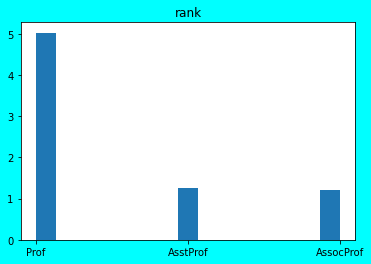

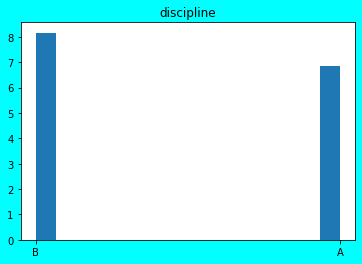

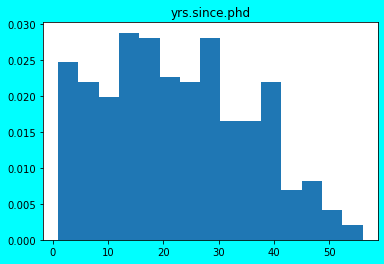

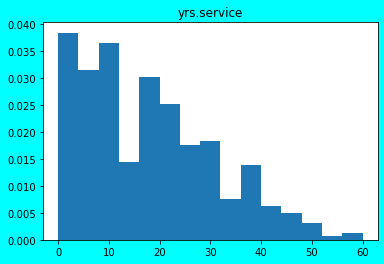

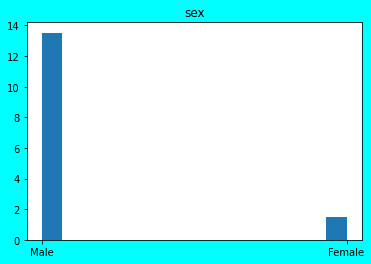

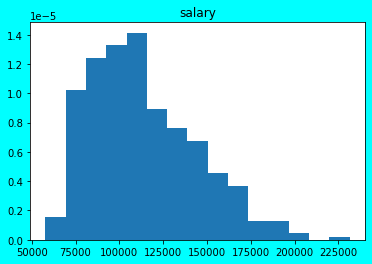

<Figure size 432x288 with 0 Axes>

In [12]:
for i in df.columns:
    
    plt.figure(facecolor='cyan')
    plt.title(f'{i}')
    plt.hist(df[i],histtype='bar',density=True,bins=15)
plt.show()
plt.tight_layout()

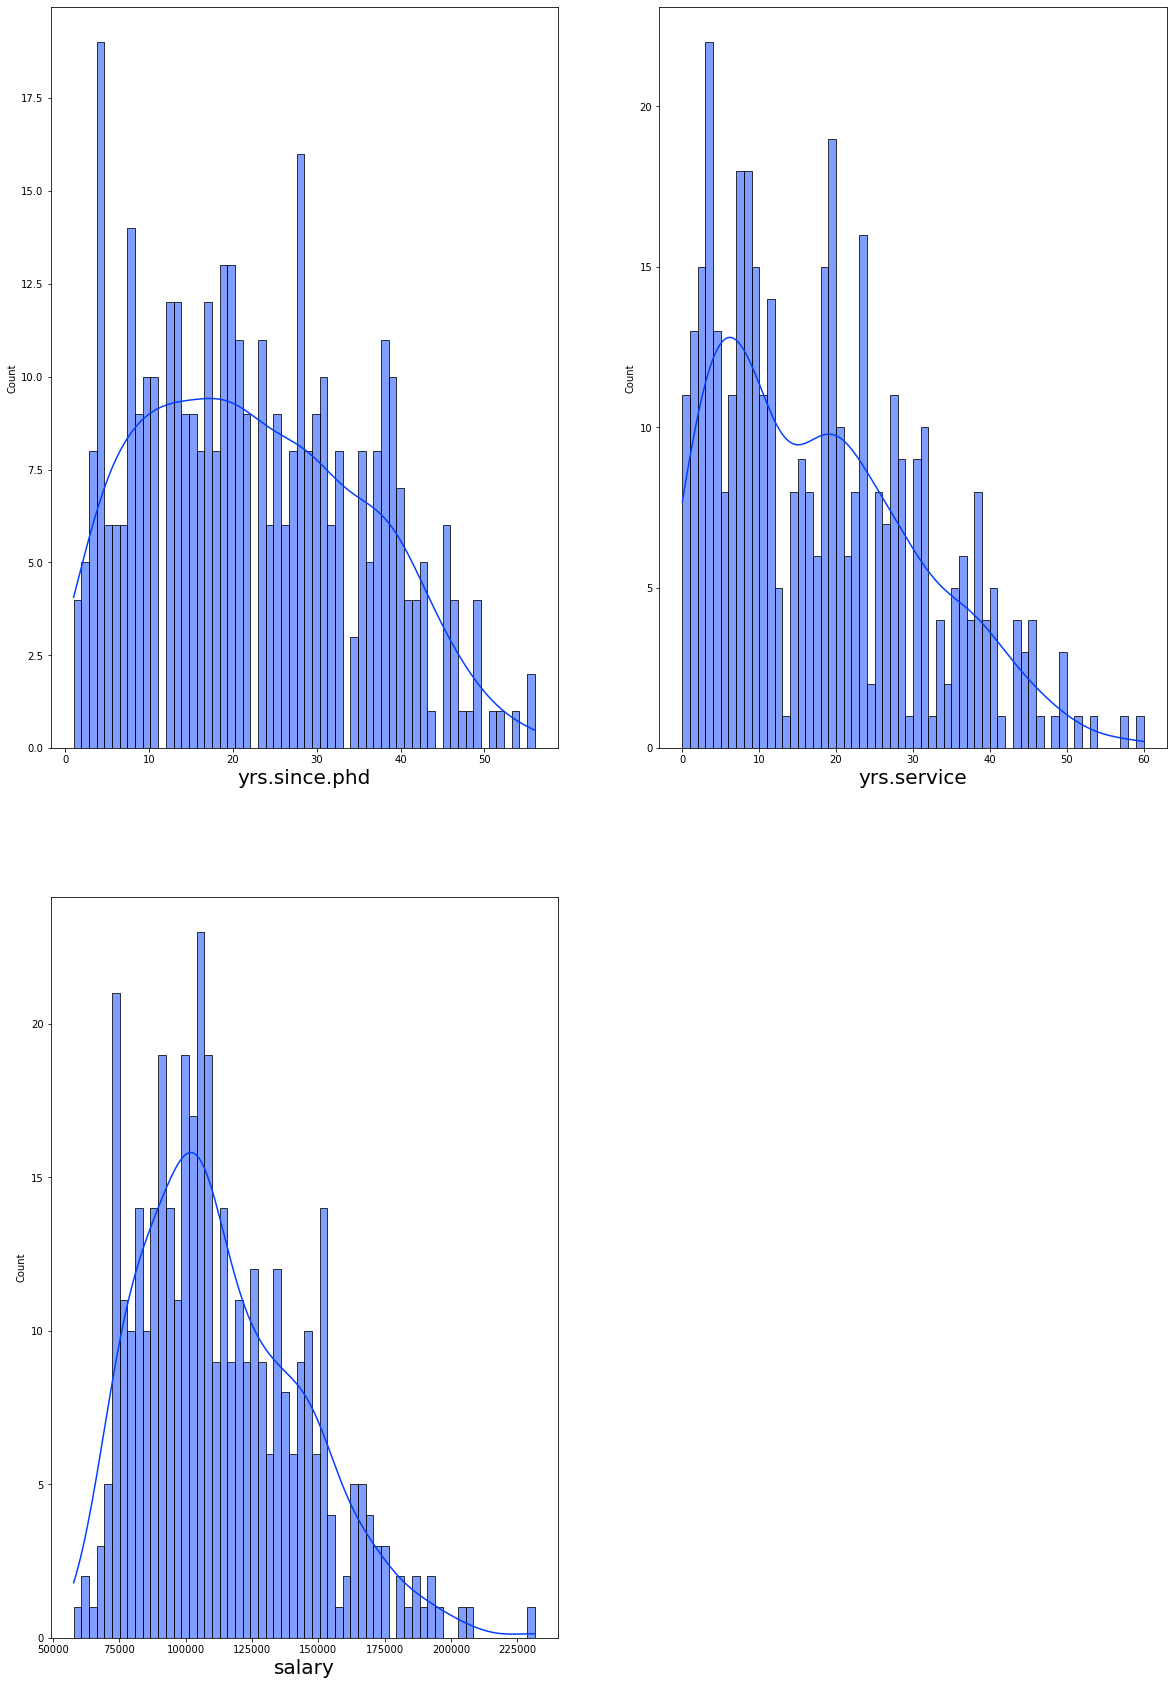

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(20,30))
sns.set_palette('bright')
graph=1

for column in cont_df.columns:
    if graph<=3:
        ax=plt.subplot(2,2,graph)
        sns.histplot(df[column],bins=60,kde=True)
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.show()
plt.tight_layout()

# 1. encoding catgorical features with ordinal encoders for discipline and rank
# 2. encode sex with onehotencoder 

In [14]:
rank=list(df['rank'].unique())
rank

['Prof', 'AsstProf', 'AssocProf']

In [15]:
discipline=list(df['discipline'].unique())
discipline

['B', 'A']

In [16]:
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder
from sklearn.compose import make_column_transformer
ohe=OneHotEncoder()
ode=OrdinalEncoder(categories=[['AsstProf', 'AssocProf','Prof'],['B', 'A']])

In [17]:
trf= make_column_transformer((ohe,['sex']),
                            (ode,['rank','discipline']),remainder='passthrough',verbose_feature_names_out=False
                            )

['sex_female','sex_male','rank','discipline','yrs.since.phd', 'yrs.service', 'salary']

In [18]:
new=pd.DataFrame(trf.fit_transform(df),
                 columns=['sex_female','sex_male','rank','discipline','yrs.since.phd', 'yrs.service', 'salary'])
new=new.drop(columns='sex_female',axis=1)
new

,sex_male,rank,discipline,yrs.since.phd,yrs.service,salary
0,1.0,2.0,0.0,19.0,18.0,139750.0
1,1.0,2.0,0.0,20.0,16.0,173200.0
2,1.0,0.0,0.0,4.0,3.0,79750.0
3,1.0,2.0,0.0,45.0,39.0,115000.0
4,1.0,2.0,0.0,40.0,41.0,141500.0
...,...,...,...,...,...,...
392,1.0,2.0,1.0,33.0,30.0,103106.0
393,1.0,2.0,1.0,31.0,19.0,150564.0
394,1.0,2.0,1.0,42.0,25.0,101738.0
395,1.0,2.0,1.0,25.0,15.0,95329.0


In [19]:
# check for nothing is loss during transformatio in continuous feature
print((df['yrs.since.phd']==new['yrs.since.phd']).all())
print((df['yrs.service']==new['yrs.service']).all())
print((df['salary']==new['salary']).all())

True
True
True


# Bivariate Analysis with correlation and scateerplot and skewness in continuous features

In [20]:
corl=np.abs(new.corr())
corl

,sex_male,rank,discipline,yrs.since.phd,yrs.service,salary
sex_male,1.000000,0.138556,0.003724,0.148788,0.153740,0.138610
rank,0.138556,1.000000,0.107365,0.700950,0.608355,0.617224
discipline,0.003724,0.107365,1.000000,0.218087,0.164599,0.156084
yrs.since.phd,0.148788,0.700950,0.218087,1.000000,0.909649,0.419231
yrs.service,0.153740,0.608355,0.164599,0.909649,1.000000,0.334745
salary,0.138610,0.617224,0.156084,0.419231,0.334745,1.000000


* Heatmap for visualizing correlation  

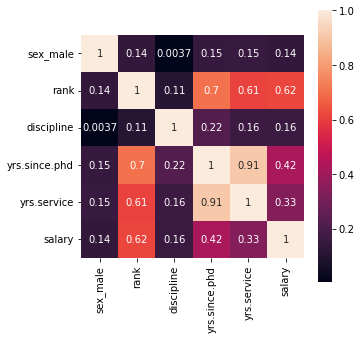

In [21]:
plt.figure(figsize=(5,5))
sns.heatmap(corl,annot=True,annot_kws={'size':10},square=True)
plt.show()

* The correlation between yrs.service and yrs.since.phd is 0.91 which is high we will check for scatterplot and relplot.

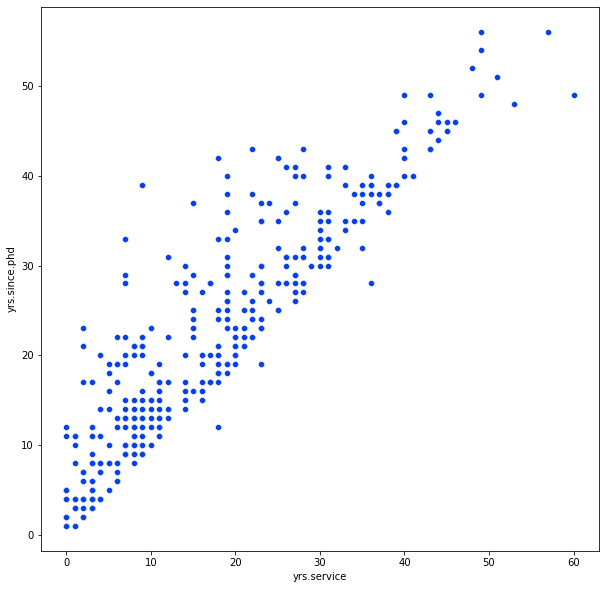

In [22]:
plt.figure(figsize=(10,10))

sns.scatterplot(x=new['yrs.service'],y=new['yrs.since.phd'],data=new)
plt.show()

<Figure size 360x360 with 0 Axes>

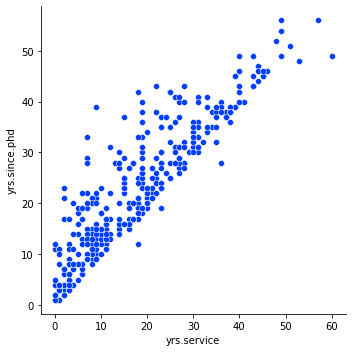

In [23]:
plt.figure(figsize=(5,5))
sns.relplot(x=new['yrs.service'],y=new['yrs.since.phd'],data=new)
plt.show()

* we will remove one of these two feature on basis of which is contributing less to target variable

<Figure size 720x720 with 0 Axes>

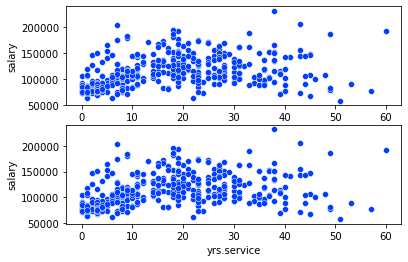

In [24]:
plt.figure(figsize=(10,10))
f,axs=plt.subplots(2,1)

sns.scatterplot(x=new['yrs.service'],y=new['salary'],data=new,ax=axs[0])

sns.scatterplot(x=new['yrs.service'],y=new['salary'],data=new,ax=axs[1])
plt.show()

* we will check also correlation with target feture

In [25]:
corl_salary=new.drop(columns=['salary'],axis=1).corrwith(df['salary']).abs().sort_values(ascending=False)
corl_salary

rank             0.617224
yrs.since.phd    0.419231
yrs.service      0.334745
discipline       0.156084
sex_male         0.138610
dtype: float64

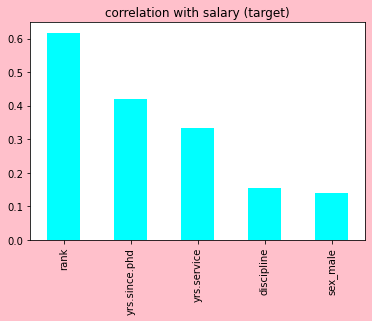

In [26]:
plt.figure(facecolor='pink')
corl_salary.plot.bar(color='cyan')
plt.title('correlation with salary (target)')
plt.show()

* As observed from graph of correlation with target feature (salary) and correlatio matrix we should eliminate 
   yrs.service having less contribution to target variable 

* Variance Inflation Factor

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
feature=new.drop(columns=['salary'],axis=1).to_numpy() # vif does not accept dataframe convert to numpy
n=new.drop(columns=['salary'],axis=1)

VIF=pd.DataFrame()
VIF['vif']=[variance_inflation_factor(feature,i)  for i in range(n.shape[1])]
VIF['Features']=n.columns


VIF

,vif,Features
0,4.371985,sex_male
1,9.108128,rank
2,1.891053,discipline
3,29.444204,yrs.since.phd
4,16.467789,yrs.service


In [29]:
feature1=new.drop(columns=['yrs.since.phd','salary'],axis=1).to_numpy()  
n1=new.drop(columns=['yrs.since.phd','salary'],axis=1)

VIF1=pd.DataFrame()
VIF1['vif']=[variance_inflation_factor(feature1,i)  for i in range(n1.shape[1])]
VIF1['Features']=n1.columns


VIF1

,vif,Features
0,4.248251,sex_male
1,6.779748,rank
2,1.805333,discipline
3,4.611349,yrs.service


In [30]:
feature2=new.drop(columns=['yrs.service','salary'],axis=1).to_numpy()
n2=new.drop(columns=['yrs.service','salary'],axis=1)

VIF2=pd.DataFrame()
VIF2['vif']=[variance_inflation_factor(feature2,i)  for i in range(n2.shape[1])]
VIF2['Features']=n2.columns


VIF2

,vif,Features
0,4.335209,sex_male
1,8.913057,rank
2,1.865106,discipline
3,8.245034,yrs.since.phd


 As VIF for yrs.since.phd is high and correlatio with target is high ,
and VIF score for yrs.service is low and correlation is low we leave it here and check for outliers then decide
 which to be drop

* as on removal of yrs.since.phd , vif score of  yrs.service  is 1.4887
* * as on removal of yrs.service , vif score of  yrs.since.phd  is 1.6411

* we will remove yrs.service by observing above dataframes 

# Outlier detection with boxplot for continuous variables only

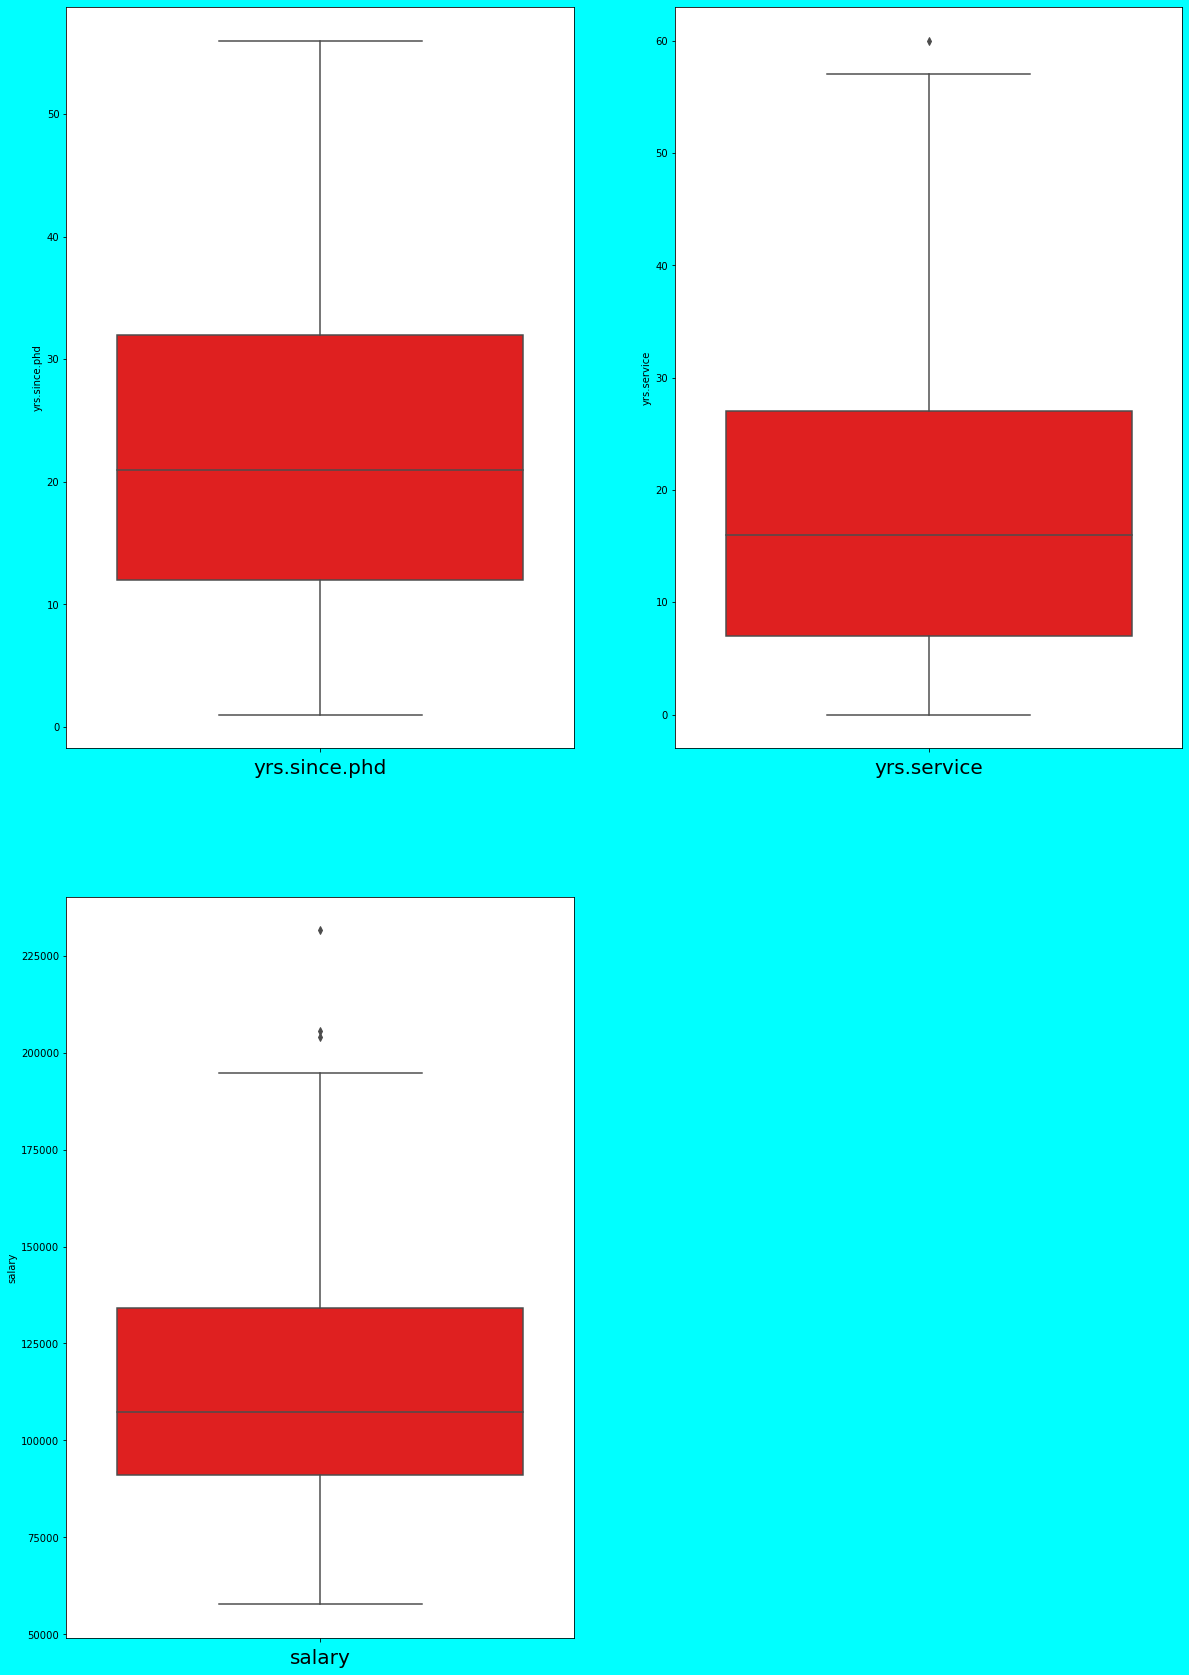

<Figure size 432x288 with 0 Axes>

In [31]:
plt.figure(figsize=(20,30),facecolor='cyan')

graph=1

for column in cont_df.columns:
    if graph<=3:
        ax=plt.subplot(2,2,graph)
        sns.boxplot(y=new[column],color='red')
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.show()
plt.tight_layout()

In [32]:
from scipy.stats import zscore
z_score=zscore(new[cont_df.columns])
boole=(np.abs(z_score)<3).all(axis=1)
new=new[boole]

In [33]:
new.shape

(393, 6)

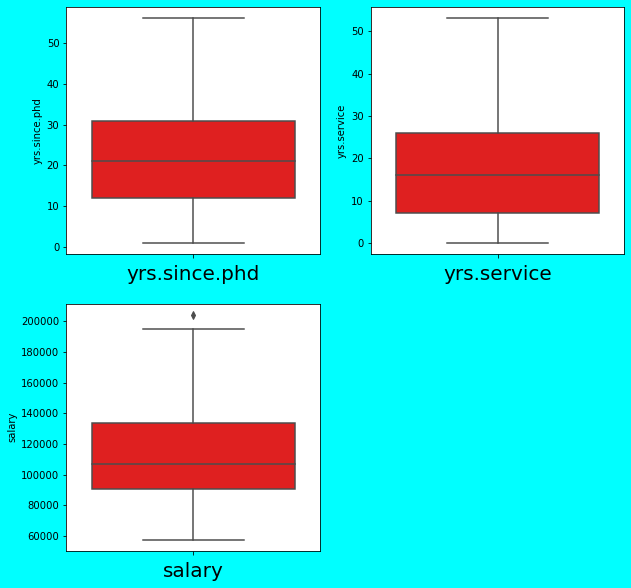

<Figure size 432x288 with 0 Axes>

In [34]:
plt.figure(figsize=(10,10),facecolor='cyan')

graph=1

for column in cont_df.columns:
    if graph<=3:
        ax=plt.subplot(2,2,graph)
        sns.boxplot(y=new[column],color='red')
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.show()
plt.tight_layout()

In [35]:
(np.abs(zscore(new))<3).all()

sex_male         False
rank              True
discipline        True
yrs.since.phd     True
yrs.service       True
salary           False
dtype: bool

* salary is Target and sex feature is categorical

# Analysis for skewness in dataset

In [36]:
new.skew()

sex_male        -2.691158
rank            -1.117309
discipline       0.179514
yrs.since.phd    0.288531
yrs.service      0.588861
salary           0.581098
dtype: float64

<AxesSubplot:>

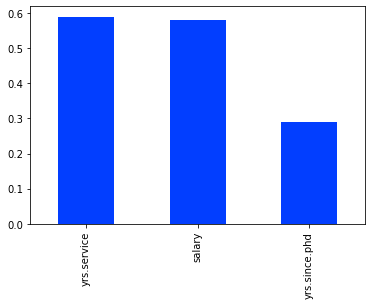

In [37]:
new[cont_df.columns].skew().abs().sort_values(ascending=False).plot.bar()

# Transformation on skew continuous features 

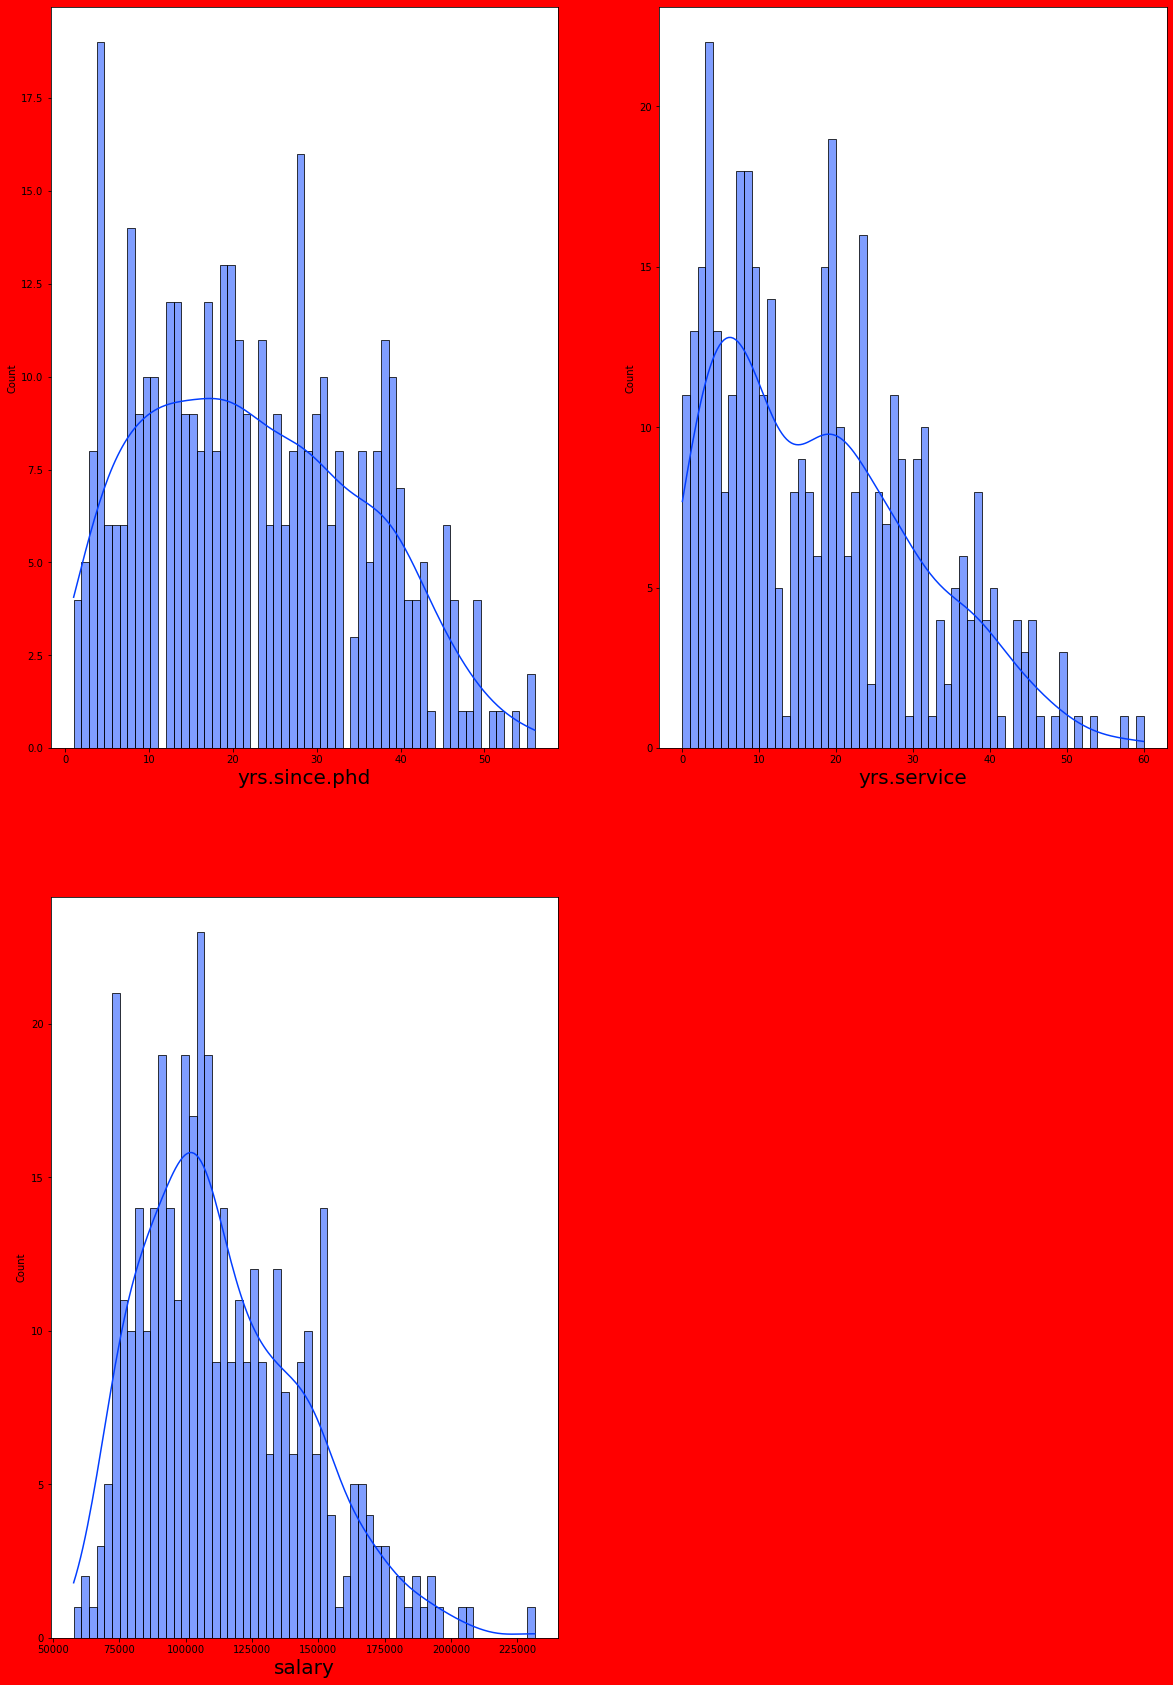

<Figure size 432x288 with 0 Axes>

In [38]:
plt.figure(figsize=(20,30),facecolor='red')

graph=1

for column in cont_df.columns:
    if graph<=3:
        ax=plt.subplot(2,2,graph)
        sns.histplot(df[column],bins=60,kde=True)
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.show()
plt.tight_layout()

In [39]:
from sklearn.preprocessing import PowerTransformer
pwr=PowerTransformer(method="yeo-johnson")
#new[['yrs.service','yrs.since.phd']]=pwr.fit_transform(new[['yrs.service','yrs.since.phd']])



<Figure size 1440x720 with 0 Axes>

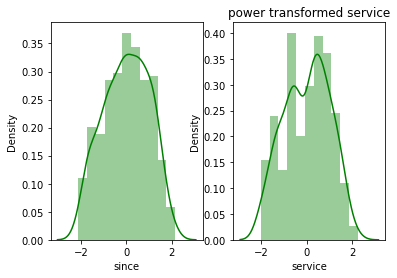

In [40]:
# transformation by powerTransformation with yeo johnson

trans=pd.DataFrame()
trans[['since','service']]=pwr.fit_transform(df[['yrs.since.phd','yrs.service']])
trans
plt.figure(figsize=(20,10))
fig,axs=plt.subplots(1,2)

k=0
for i in trans.columns:
    if k<2:
        sns.distplot(trans[i],ax=axs[k],color='green')
        plt.title('power transformed {}'.format(i))
    k+=1    
    
plt.show()    

<Figure size 1440x720 with 0 Axes>

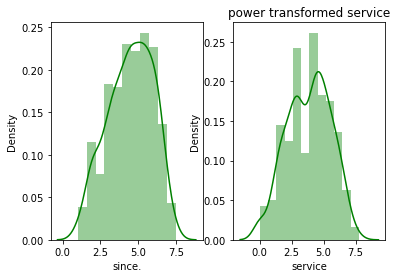

In [41]:
Sqr_trans=pd.DataFrame()
Sqr_trans[['since.','service']]=np.sqrt(df[['yrs.since.phd','yrs.service']])
Sqr_trans
plt.figure(figsize=(20,10))
fig,axs=plt.subplots(1,2)

k=0
for i in Sqr_trans.columns:
    if k<2:
        sns.distplot(Sqr_trans[i],ax=axs[k],color='green')
        plt.title('power transformed {}'.format(i))
    k+=1    
    
plt.show()    

In [42]:
for i in trans.columns:
    print('skewness of feature {0} is {1} by Power transformation with yeo johnson method '.format(i,(trans[i]).skew()))
    print('Kurtosis of feature {0} is {1} by Power transformation with yeo johnson method '.format(i,(trans[i]).kurtosis()))
    print('-'*60)

skewness of feature since is -0.13275744171280343 by Power transformation with yeo johnson method 
Kurtosis of feature since is -0.8576367739604449 by Power transformation with yeo johnson method 
------------------------------------------------------------
skewness of feature service is -0.1221515082878693 by Power transformation with yeo johnson method 
Kurtosis of feature service is -0.8671218914827068 by Power transformation with yeo johnson method 
------------------------------------------------------------


In [43]:
for i in Sqr_trans.columns:
    print('skewness of feature {0} is {1} by  transformation with squareroot '.format(i,(Sqr_trans[i]).skew()))
    print('kurtosis of feature {0} is {1} by  transformation with Squareroot '.format(i,(Sqr_trans[i]).kurtosis()))
    print('-'*60)

skewness of feature since. is -0.28074009893667884 by  transformation with squareroot 
kurtosis of feature since. is -0.7363241994055008 by  transformation with Squareroot 
------------------------------------------------------------
skewness of feature service is -0.16035285418029294 by  transformation with squareroot 
kurtosis of feature service is -0.6782307451766738 by  transformation with Squareroot 
------------------------------------------------------------


* As power transformation is handling skewness better than sqaureroot function .
* let transform continuous features with powertranformer 

In [44]:
from sklearn.preprocessing import PowerTransformer
pwr=PowerTransformer(method="yeo-johnson")
new[['yrs.service','yrs.since.phd']]=pwr.fit_transform(new[['yrs.service','yrs.since.phd']])



In [45]:
new

,sex_male,rank,discipline,yrs.since.phd,yrs.service,salary
0,1.0,2.0,0.0,-0.113450,0.268886,139750.0
1,1.0,2.0,0.0,-0.034553,0.120901,173200.0
2,1.0,0.0,0.0,-1.624261,-1.284495,79750.0
3,1.0,2.0,0.0,1.599764,1.461099,115000.0
4,1.0,2.0,0.0,1.310282,1.553159,141500.0
...,...,...,...,...,...,...
392,1.0,2.0,1.0,0.879244,1.009922,103106.0
393,1.0,2.0,1.0,0.749533,0.339518,150564.0
394,1.0,2.0,1.0,1.427729,0.725819,101738.0
395,1.0,2.0,1.0,0.338749,0.043130,95329.0


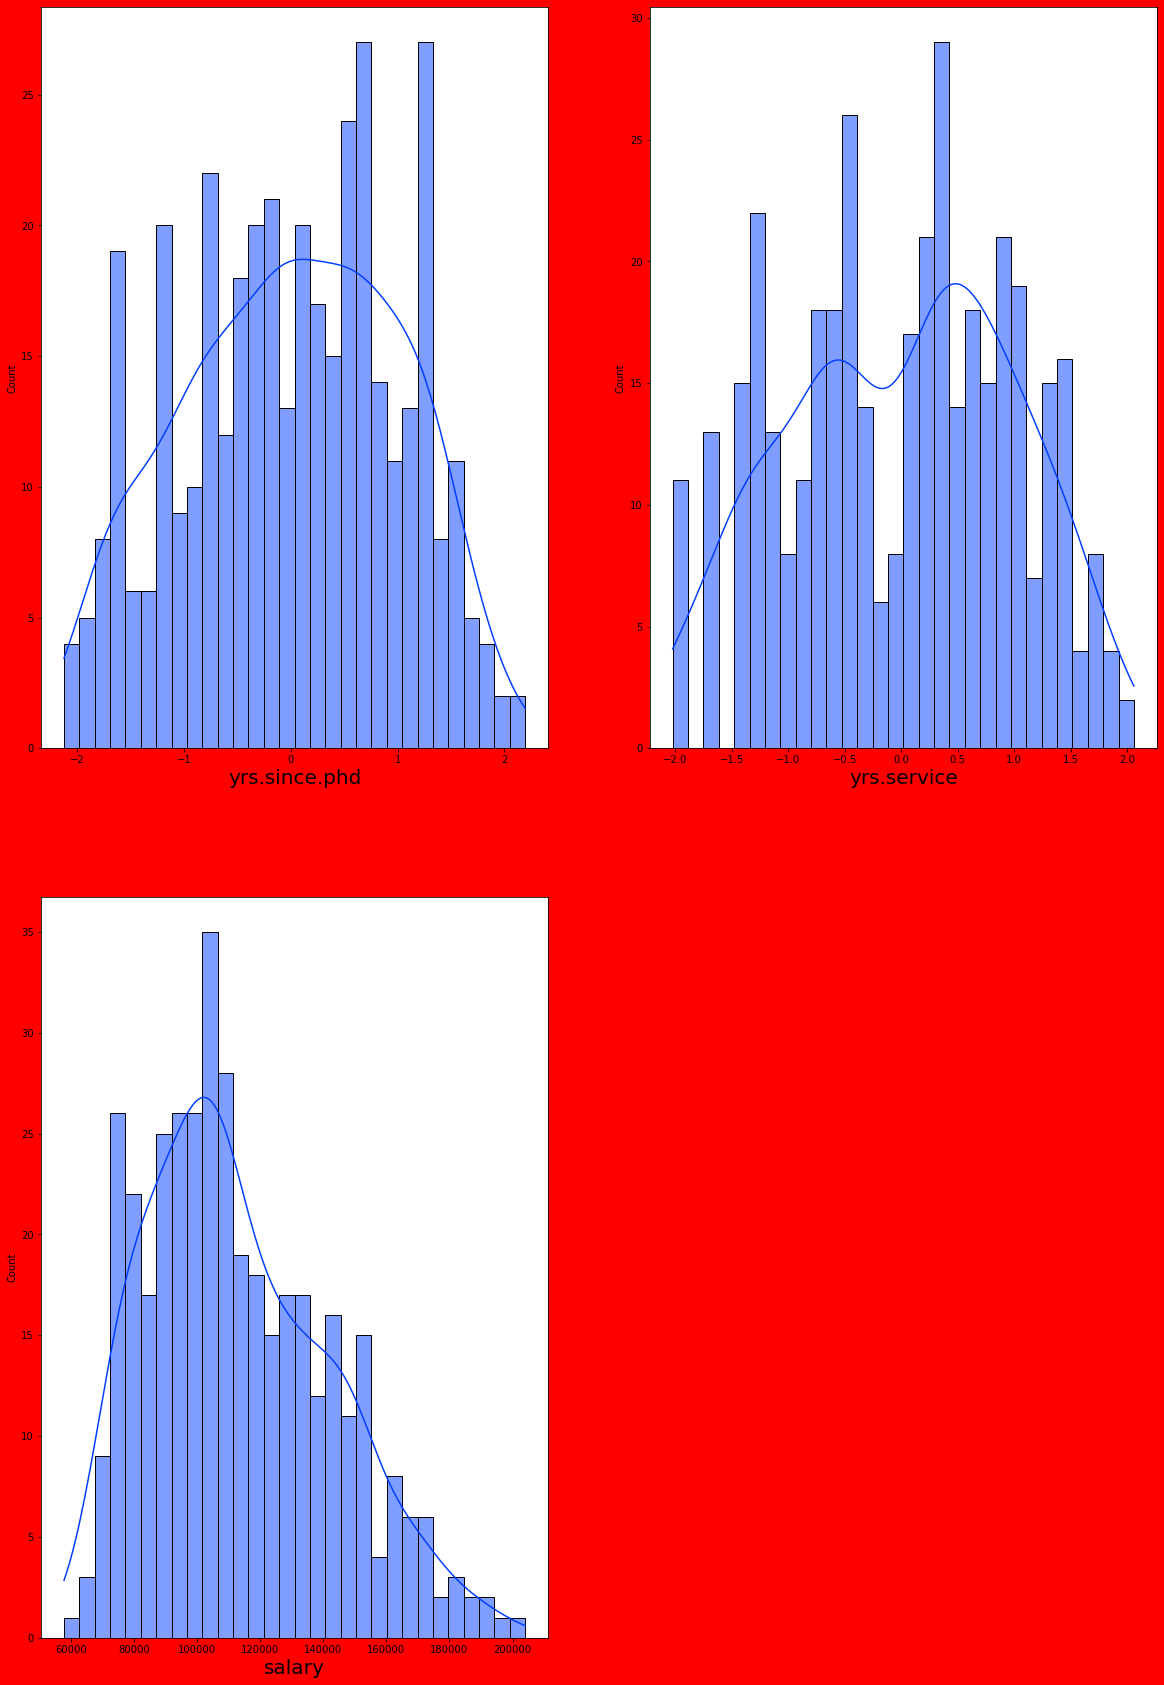

<Figure size 432x288 with 0 Axes>

In [46]:
plt.figure(figsize=(20,30),facecolor='red')

graph=1

for column in cont_df.columns:
    if graph<=3:
        ax=plt.subplot(2,2,graph)
        sns.histplot(new[column],bins=30,kde=True)
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.show()
plt.tight_layout()

* skewness after transformation

In [47]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

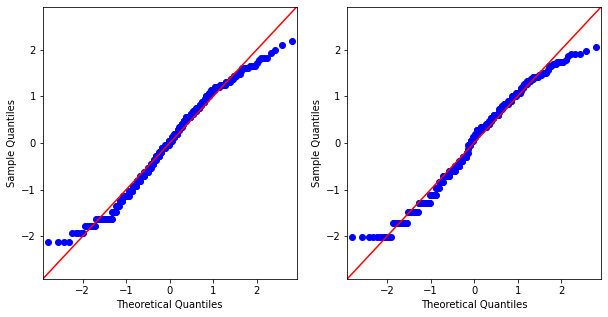

In [48]:
f=plt.figure(figsize=(10,5))

sm.qqplot(new['yrs.since.phd'],line='45',ax=f.add_subplot(1,2,1))
sm.qqplot(new['yrs.service'],line='45',ax=f.add_subplot(1,2,2))

plt.show()

In [49]:

new.skew()

sex_male        -2.691158
rank            -1.117309
discipline       0.179514
yrs.since.phd   -0.134628
yrs.service     -0.129060
salary           0.581098
dtype: float64

<AxesSubplot:>

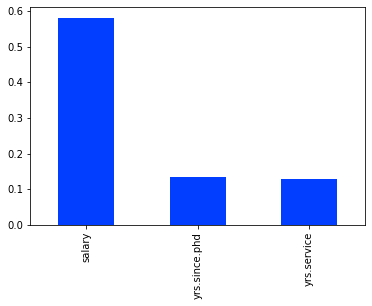

In [50]:
# checking skewness removed for ontinuous variable after  power transformation
new[cont_df.columns].skew().abs().sort_values(ascending=False).plot.bar()

* scaling of feature with standard scaler

In [51]:
# copying datframe into new dataframe data
data=new.copy()

In [52]:
data

,sex_male,rank,discipline,yrs.since.phd,yrs.service,salary
0,1.0,2.0,0.0,-0.113450,0.268886,139750.0
1,1.0,2.0,0.0,-0.034553,0.120901,173200.0
2,1.0,0.0,0.0,-1.624261,-1.284495,79750.0
3,1.0,2.0,0.0,1.599764,1.461099,115000.0
4,1.0,2.0,0.0,1.310282,1.553159,141500.0
...,...,...,...,...,...,...
392,1.0,2.0,1.0,0.879244,1.009922,103106.0
393,1.0,2.0,1.0,0.749533,0.339518,150564.0
394,1.0,2.0,1.0,1.427729,0.725819,101738.0
395,1.0,2.0,1.0,0.338749,0.043130,95329.0


# 1. Analyze R2 score after removing yrs.since.phd from algorithm

In [53]:
x=data.drop(columns=['yrs.since.phd','salary'],axis=1)
y=data.salary

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
scaler=StandardScaler()
x_scale=scaler.fit_transform(x)

In [55]:
from sklearn.model_selection import train_test_split


maxR2=0
maxRn=0
for i  in range(1,200):
    trn_x,tst_x,trn_y,tst_y=train_test_split(x_scale,y,test_size=0.25,random_state=i)
    regr=LinearRegression()
    regr.fit(trn_x,trn_y)
    r2=regr.score(tst_x,tst_y)
    print("R squared ",r2,'Random sate ',i)
    
    if r2>maxR2:
        maxR2=r2
        maxRn=i
        print("R-squared",maxR2,"random_state",i)
        
        

R squared  0.5166385631925132 Random sate  1
R-squared 0.5166385631925132 random_state 1
R squared  0.3823546687461986 Random sate  2
R squared  0.40278085619742543 Random sate  3
R squared  0.43319678020187413 Random sate  4
R squared  0.4644273136347967 Random sate  5
R squared  0.3592376293211804 Random sate  6
R squared  0.4984081058785774 Random sate  7
R squared  0.3907930762560977 Random sate  8
R squared  0.44337004196954144 Random sate  9
R squared  0.4174982992680928 Random sate  10
R squared  0.5209286740787606 Random sate  11
R-squared 0.5209286740787606 random_state 11
R squared  0.4001872232821413 Random sate  12
R squared  0.5186740154734077 Random sate  13
R squared  0.35917327539783783 Random sate  14
R squared  0.4986388471343258 Random sate  15
R squared  0.34989584853150213 Random sate  16
R squared  0.45091477456070606 Random sate  17
R squared  0.48907620499597515 Random sate  18
R squared  0.5115978071600698 Random sate  19
R squared  0.4797461009105819 Random sa

In [56]:
print("maximum R squared when yrs.since.phd feature is removed, is ",maxR2,'on random state',maxRn)        

maximum R squared when yrs.since.phd feature is removed, is  0.5578872279794929 on random state 92


# 2. Analyze R2 score when all feature are considered in algorithm

In [57]:
x1=data.drop(columns=['salary'],axis=1)
y1=data.salary

scaler1=StandardScaler()
x1_scale=scaler1.fit_transform(x1)

maxR21=0
maxRn1=0
for i  in range(1,200):
    train_x,test_x,train_y,test_y=train_test_split(x1_scale,y1,test_size=0.25,random_state=i)
    regr1=LinearRegression()
    regr1.fit(train_x,train_y)
    rsq2=regr1.score(test_x,test_y)
    print("R squared ",rsq2,'Random sate ',i)
    
    if rsq2>maxR21:
        maxR21=rsq2
        maxRn1=i
        print("rsquared",maxR21,"random_state",i)
        
        

R squared  0.5282035963812195 Random sate  1
rsquared 0.5282035963812195 random_state 1
R squared  0.39360064503915637 Random sate  2
R squared  0.4149188806201639 Random sate  3
R squared  0.4333490454736213 Random sate  4
R squared  0.48068739951314277 Random sate  5
R squared  0.3500403580589341 Random sate  6
R squared  0.5031317022049451 Random sate  7
R squared  0.4065879110864098 Random sate  8
R squared  0.4460617382691977 Random sate  9
R squared  0.43121066195438373 Random sate  10
R squared  0.5387068720928371 Random sate  11
rsquared 0.5387068720928371 random_state 11
R squared  0.40381163039863444 Random sate  12
R squared  0.5220608932814321 Random sate  13
R squared  0.3168614198613392 Random sate  14
R squared  0.5110390291934702 Random sate  15
R squared  0.3600707195091253 Random sate  16
R squared  0.45359675437692193 Random sate  17
R squared  0.47108583815906535 Random sate  18
R squared  0.5026843395427567 Random sate  19
R squared  0.49668747474703057 Random sate

In [58]:
print("maximum R squared (all feature are considered in model)  is ",maxR21,'on random state',maxRn1)    

maximum R squared (all feature are considered in model)  is  0.5715034529935459 on random state 92


# 3 . Analyze when yrs.service is removed from algoriyhm removed

In [59]:
x2=data.drop(columns=['yrs.service','salary'],axis=1)
y2=data.salary

scaler2=StandardScaler()
x2_scale=scaler2.fit_transform(x2)

maxR22=0
maxRn2=0
for i  in range(1,200):
    train_in,test_in,train_op,test_op=train_test_split(x2_scale,y2,test_size=0.25,random_state=i)
    regr2=LinearRegression()
    regr2.fit(train_in,train_op)
    rs2=regr2.score(test_in,test_op)
    print("R squared ",rs2,'Random sate ',i)
    
    if rs2>maxR22:
        maxR22=rs2
        maxRn2=i
        print("rsquared",maxR22,"random_state",i)
        

R squared  0.5259847589112223 Random sate  1
rsquared 0.5259847589112223 random_state 1
R squared  0.40034274628146893 Random sate  2
R squared  0.40075336459149613 Random sate  3
R squared  0.41615540614685675 Random sate  4
R squared  0.46514154917963657 Random sate  5
R squared  0.3547630717196536 Random sate  6
R squared  0.5228727676606177 Random sate  7
R squared  0.38871133425613547 Random sate  8
R squared  0.4425236805824556 Random sate  9
R squared  0.41048174985312724 Random sate  10
R squared  0.5130044068756818 Random sate  11
R squared  0.4012687013207834 Random sate  12
R squared  0.5645437665558513 Random sate  13
rsquared 0.5645437665558513 random_state 13
R squared  0.3524987346633671 Random sate  14
R squared  0.4924665780030908 Random sate  15
R squared  0.33743316290934355 Random sate  16
R squared  0.464585010794173 Random sate  17
R squared  0.46958962347150457 Random sate  18
R squared  0.5040772039675782 Random sate  19
R squared  0.4963756100873675 Random sate

In [60]:
print("maximum R squared (yrs.service)  is ",maxR22,'on random state',maxRn2)    

maximum R squared (yrs.service)  is  0.5645437665558513 on random state 13


# AS R2 squared is obtained best when all features are considered in algorithm 

In [61]:
# spliting data without removing any features
X=data.drop(columns=['salary'],axis=1)
Y=data.salary


In [62]:
# trainig and testing data
x_train,x_test,y_train,y_test=train_test_split(x1_scale,y1,test_size=0.25,random_state=92)


In [63]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor

In [64]:
from sklearn.metrics import mean_squared_error,r2_score 

In [65]:
names = ['linearRegr', "KNN", "SCRegr","GBreg", "DecisionTreeRegr","RandomForestRegr","XGBRegr",'AdaBoostReg']
regressors = [
    LinearRegression(),
    KNeighborsRegressor(),  # 5   # 20
    SVR(),
    GradientBoostingRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    XGBRegressor(),
    AdaBoostRegressor()]                # 150

scores_train= []
scores_test=[]
rmse_list=[]
for name,reg in zip(names,regressors):
    reg.fit(x_train,y_train)
    ypred=reg.predict(x_test)
    # r2 score train
    score = reg.score(x_train,y_train)
    # r2 score test
    score_test=reg.score(x_test,y_test)
    # RMSE 
    rms=np.sqrt(mean_squared_error(y_test,ypred))
    
    rmse_list.append(rms)
    scores_train.append(score)
    scores_test.append(score_test)

In [66]:
score=pd.DataFrame({"Regressor":names,"train_score":scores_train,"Test score":scores_test,'Rmse':rmse_list})
score


,Regressor,train_score,Test score,Rmse
0,linearRegr,0.417652,0.571503,19598.284945
1,KNN,0.552051,0.604321,18832.839672
2,SCRegr,-0.042518,-0.063793,30879.688053
3,GBreg,0.723507,0.560734,19843.029236
4,DecisionTreeRegr,0.956943,0.294366,25149.774643
5,RandomForestRegr,0.865761,0.566643,19709.117905
6,XGBRegr,0.953237,0.296307,25115.158897
7,AdaBoostReg,0.505080,0.602948,18865.501401


In [67]:
from sklearn.model_selection import cross_val_score 
# linear regresion

val=cross_val_score(LinearRegression(),x1_scale,y1,cv=10,scoring='r2')
print('scores=',val)

print('score mean',val.mean())

scores= [0.5995478  0.23547584 0.63736849 0.50786171 0.40420094 0.52356473
 0.34860434 0.29290203 0.28227129 0.37765289]
score mean 0.4209450056527899


In [68]:
#knn 
val2=cross_val_score( KNeighborsRegressor(n_neighbors=10,metric="minkowski",leaf_size=40),
                    x1_scale,y1,cv=5,scoring='r2')
print('scores=',val2)
print('score mean',val2.mean())

scores= [0.2475393  0.58936899 0.44172081 0.33080405 0.32098059]
score mean 0.38608274822595356


In [69]:
val3=cross_val_score(DecisionTreeRegressor(max_depth=8,min_samples_leaf=4,min_samples_split=2),
                    x1_scale,y1,cv=10,scoring='r2')
print('scores=',val3)
print('score mean',val3.mean())

scores= [ 0.49142022 -0.2127333   0.62337863  0.5459809   0.47054653  0.28508929
  0.36342472  0.34446487 -0.09085332  0.0986731 ]
score mean 0.2919391646027224


In [70]:
val4=cross_val_score(SVR(kernel="linear", C=100000,gamma=0.1),
                    x1_scale,y1,cv=10,scoring='r2')
print('scores=',val4)
print('score mean',val4.mean())

scores= [0.59512137 0.31997891 0.62644349 0.50852302 0.39105083 0.52059607
 0.30825663 0.24114445 0.249702   0.241938  ]
score mean 0.4002754781775694


In [71]:
val5=cross_val_score( RandomForestRegressor(max_depth=8, n_estimators=300,bootstrap=True,oob_score=True),
                    x1_scale,y1,cv=10,scoring='r2')
print('scores=',val5)
print(val5.mean())

scores= [5.49301796e-01 3.97343968e-04 6.67662126e-01 5.36370284e-01
 5.23808284e-01 4.33569772e-01 4.47185215e-01 3.93955363e-01
 1.46144965e-01 3.06460996e-01]
0.4004856145502217


In [72]:
val6=cross_val_score( AdaBoostRegressor(),
                    x1_scale,y1,cv=10,scoring='r2')
print('scores=',val6)
print(val6.mean())

scores= [0.53639307 0.22864664 0.65181011 0.56516684 0.47281308 0.45330655
 0.27653851 0.41671495 0.2380989  0.43894557]
0.42784342251599544


* we will perform randomforest ,linearregression and knn regressor

* linear regression gives most generalized score among all algorithms
* Hyperparameter can be perform on KNNRegressor and RandomForestRegressor,SVR

In [73]:
from sklearn.model_selection import GridSearchCV

para={'n_neighbors':[3,5,7,9,11],'metric':["minkowski",'cosine'],'leaf_size':[20,30,40,45],
        'weights':['uniform','distance'],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}



knreg=KNeighborsRegressor()
      
grid=GridSearchCV(knreg,param_grid=para,cv=5)
grid.fit(x_train,y_train)  
      
print(grid.best_params_)      

{'algorithm': 'auto', 'leaf_size': 20, 'metric': 'cosine', 'n_neighbors': 11, 'weights': 'uniform'}


In [74]:
knn2=grid.best_estimator_
knn2.fit(x_train,y_train)
knn2.score(x_test,y_test)

0.6220552175527947

# hyperparameter tuning on DecisonTree


In [75]:
param={'criterion' : ["squared_error", "absolute_error", "poisson"],
                     'max_depth' :[3,4,5,6],
                      'min_samples_split' :[10,12,15,18,20], 
                     'min_samples_leaf' :[4,5,6,7,8,9],
                   
                      }
dtr=DecisionTreeRegressor()

In [76]:
dtgrid=GridSearchCV(dtr,param_grid=param,cv=5)
dtgrid.fit(x_train,y_train)  
      
print(dtgrid.best_params_)      

{'criterion': 'poisson', 'max_depth': 3, 'min_samples_leaf': 9, 'min_samples_split': 10}


In [77]:
Dtr=dtgrid.best_estimator_
Dtr.fit(x_train,y_train)
Dtr.score(x_test,y_test)

0.547609507111849

# Hyper tunning of RandomForest

In [78]:
params={'criterion' : ["squared_error", "absolute_error", "poisson"],
                     'max_depth' :[4,5,6],
                      'min_samples_split' :[10,12,15], 
                     'min_samples_leaf' :[4,6,8,9],
                     'bootstrap':['True'],
                      'oob_score':['True'],
                     'max_samples' : [0.7,0.8],
                      }
Rf=RandomForestRegressor()

RFgrid=GridSearchCV(Rf,param_grid=params,cv=5)
RFgrid.fit(x_train,y_train)  
      
print(RFgrid.best_params_)      

{'bootstrap': 'True', 'criterion': 'squared_error', 'max_depth': 4, 'max_samples': 0.7, 'min_samples_leaf': 6, 'min_samples_split': 12, 'oob_score': 'True'}


In [79]:
Rf2=RFgrid.best_estimator_
Rf2.fit(x_train,y_train)
Rf2.score(x_test,y_test)

0.6111801807463011

# Hyper tunning of SVR

In [80]:
parms={'kernel':['linear','poly','rbf','sigmoid'],
       'gamma':[1,0.1,0.01,0.001,0.0001],
       "C":[100,1000,100000,1000000]}
       
gsv=GridSearchCV(SVR(),cv=5,param_grid=parms)
gsv.fit(x_train,y_train)
print(gsv.best_params_)

{'C': 100000, 'gamma': 0.1, 'kernel': 'rbf'}


In [81]:
SVR2=gsv.best_estimator_
SVR2.fit(x_train,y_train)
print('R2 -squared =' ,SVR2.score(x_test,y_test))
      
pred_svr2=SVR2.predict(x_test)
print('RMSE =',np.sqrt(mean_squared_error(y_test,pred_svr2)))      

R2 -squared = 0.6376211052512382
RMSE = 18022.948946044464


* adaboostRegressor Hyperparameter tunning

In [82]:
par={'n_estimators':[25,47,50,100],'learning_rate':[0.001,0.01,0.1,0.5,0.05,1],
      'loss':['linear', 'square', 'exponential']}

gr_src=GridSearchCV(AdaBoostRegressor(),cv=5,param_grid=par)
gr_src.fit(x_train,y_train)
print(gr_src.best_params_)


{'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 25}


In [83]:
# {'learning_rate': 0.05, 'loss': 'exponential', 'n_estimators': 50}

adareg1=gr_src.best_estimator_
adareg1.fit(x_train,y_train)
adareg1.score(x_test,y_test)

0.5601640309120799

# out of all regressor SVR is giving best score


In [84]:
svr_cross=cross_val_score(SVR(C= 100000, gamma= 0.1, kernel= 'rbf'),x1_scale,y1,cv=10,scoring='r2')
print(svr_cross)
print(svr_cross.mean())

[0.57791675 0.14635626 0.65423762 0.62281457 0.46767473 0.56868933
 0.46384779 0.4179587  0.26396194 0.41482748]
0.45982851671138575


# Also Analyse with excluding multicollinearity i.e with removing yrs.service feature 
* again splitting data into train test data

In [85]:
x2=data.drop(columns=['yrs.service','salary'],axis=1)
y2=data.salary

scaler2=StandardScaler()
x2_scale=scaler2.fit_transform(x2)


In [86]:
train_in,test_in,train_op,test_op=train_test_split(x2_scale,y2,test_size=0.25,random_state=13)

In [87]:
scores2_train= []
scores2_test=[]
rmse2_list=[]

for name2,reg2 in zip(names,regressors):
    reg2.fit(train_in,train_op)
    ypred2=reg2.predict(test_in)
    # r2 score train
    score2 = reg2.score(train_in,train_op)
    # r2 score test
    score_test2=reg2.score(test_in,test_op)
    # RMSE 
    rms2=np.sqrt(mean_squared_error(test_op,ypred2))
    
    rmse2_list.append(rms2)
    scores2_train.append(score2)
    scores2_test.append(score_test2)

In [88]:
score=pd.DataFrame({"Regressor":names,"train_score":scores2_train,"Test score":scores2_test,'Rmse':rmse2_list})
score

,Regressor,train_score,Test score,Rmse
0,linearRegr,0.411031,0.564544,18532.104615
1,KNN,0.576370,0.469162,20461.320674
2,SCRegr,-0.044004,-0.006911,28180.450686
3,GBreg,0.621750,0.482957,20193.692819
4,DecisionTreeRegr,0.694927,0.296330,23557.925673
5,RandomForestRegr,0.670975,0.374806,22205.472884
6,XGBRegr,0.694746,0.306083,23394.102608
7,AdaBoostReg,0.487516,0.534558,19159.540746


In [89]:
# Perform cross validation score to analyse overfitting and most generalized algorithm

In [90]:
for reg2,names2 in zip(regressors,names):
    crs=cross_val_score(reg2,x2_scale,y2,cv=10)
    score=crs.mean()
    print(crs)
    print('-'*30)
    print('validation score for {0} algorithm is {1} '.format(names2,score))
    print('*'*70)

[0.61659044 0.22145368 0.68871071 0.51198171 0.43012743 0.52572213
 0.30139962 0.24558232 0.30484199 0.35597261]
------------------------------
validation score for linearRegr algorithm is 0.4202382641621 
**********************************************************************
[0.51494171 0.06867832 0.67714454 0.6095267  0.46332667 0.40265607
 0.24058422 0.25450723 0.15428888 0.1857112 ]
------------------------------
validation score for KNN algorithm is 0.35713655417066414 
**********************************************************************
[-0.00613082 -0.00071348 -0.04025589 -0.00351991 -0.21243991 -0.07100514
 -0.00055499 -0.02396392 -0.44771824 -0.08015648]
------------------------------
validation score for SCRegr algorithm is -0.08864587796195098 
**********************************************************************
[0.49369723 0.14682086 0.66263076 0.41389473 0.4865712  0.44825406
 0.27545872 0.30409133 0.09435356 0.25079104]
------------------------------
validation score 

In [91]:
# we will check all algorithms 

In [92]:
# Hyperparameter tunning on SVR with new set of training data
parms={'kernel':['linear','poly','rbf','sigmoid'],
       'gamma':[1,0.1,0.01,0.001,0.0001],
       "C":[100,1000,100000,1000000]}
       
gsv2=GridSearchCV(SVR(),cv=5,param_grid=parms)
gsv2.fit(train_in,train_op)
print(gsv2.best_params_)

SVR3=gsv2.best_estimator_
SVR3.fit(train_in,train_op)
print('R2 score-',SVR3.score(test_in,test_op))

{'C': 1000000, 'gamma': 0.1, 'kernel': 'rbf'}
R2 score- 0.5578184126073047


In [93]:
# Hyperparameter tunning on AdaboostRegressor with new set of training data

par={'n_estimators':[25,47,50,100],'learning_rate':[0.001,0.01,0.1,0.5,0.05,1],
      'loss':['linear', 'square', 'exponential']}

gr_src2=GridSearchCV(AdaBoostRegressor(),cv=5,param_grid=par)
gr_src2.fit(train_in,train_op)
print(gr_src2.best_params_)

adareg2=gr_src2.best_estimator_
adareg2.fit(train_in,train_op)
print(adareg2.score(test_in,test_op))


{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 25}
0.5327185465699187


In [94]:
# Hyperparameter tunning on RandomForestRegressor with new set of training data

params={'criterion' : ["squared_error", "absolute_error", "poisson"],
                     'max_depth' :[4,5,6],
                      'min_samples_split' :[10,12,15], 
                     'min_samples_leaf' :[4,6,8,9],
                     'bootstrap':['True'],
                      'oob_score':['True'],
                     'max_samples' : [0.7,0.8],
                      }
Rf=RandomForestRegressor()

RFsearch=GridSearchCV(Rf,param_grid=params,cv=5)
RFsearch.fit(train_in,train_op)  
      
print(RFsearch.best_params_)     

Rf3=RFsearch.best_estimator_
Rf3.fit(train_in,train_op)
print(Rf3.score(test_in,test_op))

{'bootstrap': 'True', 'criterion': 'absolute_error', 'max_depth': 4, 'max_samples': 0.8, 'min_samples_leaf': 4, 'min_samples_split': 10, 'oob_score': 'True'}
0.5296641134209701


# Finalyzing and saving algorithm 


* Support Vector Regressor is modelized  with all features are considered in traing and testing data set
  x_train,y_train,x_test ,y_test with standized data x1_scale

* Algoriyhms is named as SVR2 with R2 score of 0.638  and RMSE of 18022

* Support vector Regressor is performing very well out of all Regressor,
having parameter as 'C': 100000,  'gamma': 0.1,  'kernel': 'rbf'

In [95]:
x1=data.drop(columns=['salary'],axis=1)
y1=data.salary

scaler1=StandardScaler()
x1_scale=scaler1.fit_transform(x1)


In [96]:

x_train,x_test,y_train,y_test=train_test_split(x1_scale,y1,test_size=0.25,random_state=92)


SVR2=gsv.best_estimator_
SVR2.fit(x_train,y_train)
print('R2 -squared =' ,SVR2.score(x_test,y_test))
      
pred_svr2=SVR2.predict(x_test)
print('RMSE =',np.sqrt(mean_squared_error(y_test,pred_svr2)))      

print('Hyperparameter for SVR =',(gsv.best_params_))

R2 -squared = 0.6376211052512382
RMSE = 18022.948946044464
Hyperparameter for SVR = {'C': 100000, 'gamma': 0.1, 'kernel': 'rbf'}


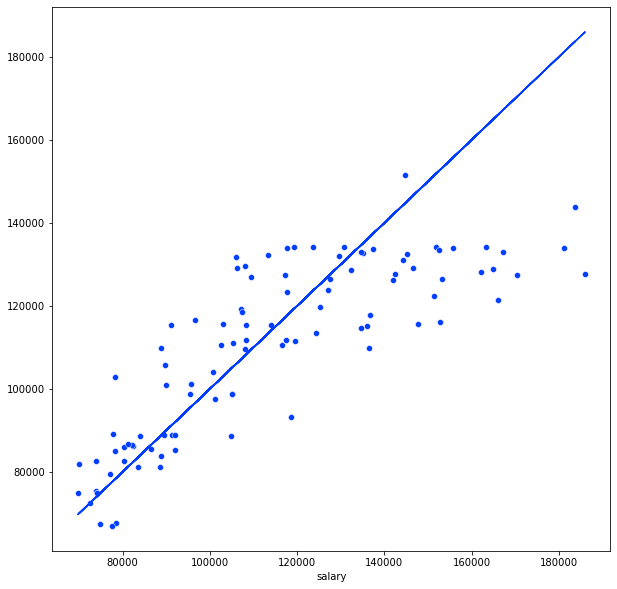

In [99]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=pred_svr2)
plt.plot(y_test,y_test)

# check for regularization 

In [125]:

from sklearn.linear_model import Lasso,Ridge
p={'alpha':[0.001,0.01,0.1,1],'random_state':range(0,11)}

gr=GridSearchCV(Lasso(),param_grid=p)
gr.fit(x_train,y_train)
print(gr.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [126]:
las=Lasso(alpha=0.001,random_state=0)
las.fit(x_train,y_train)
print(las.score(x_test,y_test))

0.5715034156987732


In [127]:
las_pred=las.predict(x_test)

* Evaluation with graph

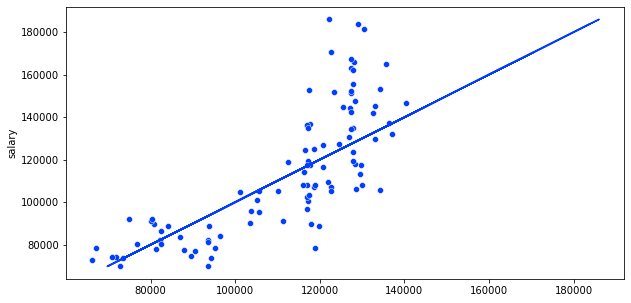

In [131]:
plt.figure(figsize=(10,5))
sns.scatterplot(las_pred,y_test)
plt.plot(y_test,y_test)

In [132]:
Ridge()

pm={'alpha':[0.001,0.01,0.1,1],}
grd=GridSearchCV(Ridge(),param_grid=pm)
grd.fit(x_train,y_train)
print(grd.best_params_)

ridg=Ridge(1)
ridg.fit(x_train,y_train)
print(ridg.score(x_test,y_test))

{'alpha': 1}
0.5704066620204933


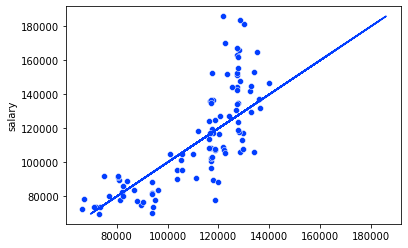

In [133]:
pred_rid=ridg.predict(x_test)
sns.scatterplot(pred_rid,y_test)
plt.plot(y_test,y_test)


# Saving Algorithm in pickle format

In [134]:
import joblib
joblib.dump(SVR2,"salarySVR2.pkl")

['salarySVR2.pkl']